# Diseño de un sismtema compensado, implementando un compensador de retardo de fase.

## El sistema consta de una planta [5/(s + 5)(s + 7)]
## Un controlador proporcional y una retroalimentación unitaria

In [54]:
import matplotlib.pyplot as plt #Importamos esta libreria para graficar
import numpy as np #Importamos esta libreria para el manejo de arrays
import control as co #importamos la libreria de control
from control.matlab import * #Importando funciones similares a las que tiene MATLAB

### Definamos las funciones de de transferencia del sistema.

In [8]:
#G1 Representa la funcion de transferencia de la planta
G1=TransferFunction([5],[1,12,35])
G1


       5
---------------
s^2 + 12 s + 35

In [10]:
#Sistema en lazo cerrado
sys=feedback(G1)
sys


       5
---------------
s^2 + 12 s + 40

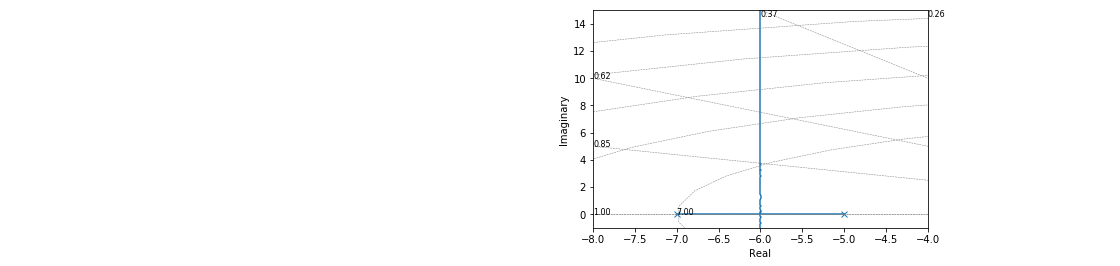

In [51]:
#Con esta funcion se graficara el lugar de las raices de lazo abierto del sistema
t1,k1=co.root_locus(G1,xlim=[-8,-4], ylim=[-1,15], plotstr='C0', Plot=True, grid=True)

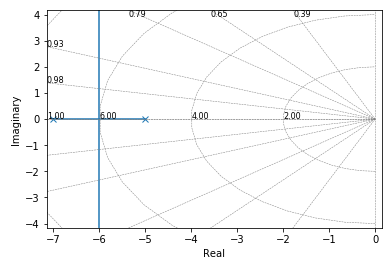

In [52]:
#Funcion igual que la anterior pero usando una sintaxis mas similar a la de matlab
t,k=control.matlab.rlocus(G1,grid=True)

(array([[-6.-82.92725728j, -6.+82.92725728j]]), [37])

###  Respuesta escalon del sistema con el controlador proporcional=1

In [49]:
a,b=control.matlab.step(sys, T=None, X0=0.0, input=0, output=None, return_x=False) 

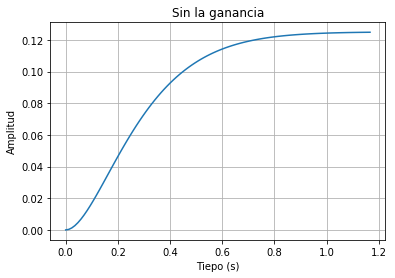

In [59]:
plt.plot(b,a)
plt.xlabel("Tiepo (s)")
plt.ylabel("Amplitud")
plt.title("Sin la ganancia")
plt.grid()

### Respuesta escalon del sistema con el controlador proporcional=37.178


In [60]:
G1=G1*37.178
G1



     185.9
---------------
s^2 + 12 s + 35

In [61]:
sys=feedback(G1)
sys


      185.9
------------------
s^2 + 12 s + 220.9

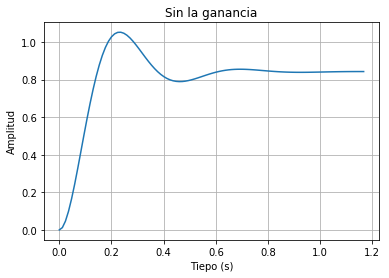

In [62]:
a,b=control.matlab.step(sys, T=None, X0=0.0, input=0, output=None, return_x=False) 
plt.plot(b,a)
plt.xlabel("Tiepo (s)")
plt.ylabel("Amplitud")
plt.title("Sin la ganancia")
plt.grid()

## Diseño de un compenasor de retardo de fase.

### El compensador diseñado en el trabajo es de la forma Gc(s)=KB(TS+1)/(TBS+1)

#### La constante de error del sistema si compenar es:

In [69]:
#kp=lim s->0 de 185.9/(1*s**2 + 12*s**2 + 35)
kp=185.9/(1*0**2 + 12*0**2 + 35)
kp

5.311428571428571

#### la constante de error deseada para que el error del sistema sea 50% mejor es:

In [70]:
Essp=(1-0.842)*0.5 #El 0.5 es para mejorar al menos un 50% la respuesta
Essp #Este es error del sistema con un 50% de mejora

0.07900000000000001

#### La constatnte de error para este este error de posción es de: 

In [73]:
# Essp=1/(1+kp1) => kp1=-1+1/Essp
kp1=-1+1/Essp
kp1

11.658227848101264

#### El nuevo kp, indica un incremento de 2.2 veces con respecto a la constante de error de poscion anterior
#### Lo que implica que B=1/2.2

#### Para diseñar el compensador  se situaran los polos y los ceros muy cerca del origen.
#### Por lo que se usara la constante de error kp1 como T
#### El compensador diseñado es Gc=kc(s + 0.116582)/(s + 0.058291)
#### Donde Gt(s)=G*K*Gc y Kt=Kc*K*5

In [76]:
#Definiendo el compensador
Gc=TransferFunction([1,0.116582],[1,0.058291])
Gc


s + 0.1166
-----------
s + 0.05829

In [79]:
#Definiendo la funcion de transferencia de trayectoria directa del sitema
Gt=co.series(Gc,TransferFunction([1],[1,12,35]))
Gt


          s + 0.1166
-------------------------------
s^3 + 12.06 s^2 + 35.7 s + 2.04

(array([[-7.        +0.00000000e+00j, -5.        +0.00000000e+00j,
         -0.058291  +0.00000000e+00j],
        [-6.8658434 +0.00000000e+00j, -5.13373065+0.00000000e+00j,
         -0.05871695+0.00000000e+00j],
        [-6.70673408+0.00000000e+00j, -5.29242008+0.00000000e+00j,
         -0.05913684+0.00000000e+00j],
        [-6.66101564+0.00000000e+00j, -5.33803448+0.00000000e+00j,
         -0.05924088+0.00000000e+00j],
        [-6.61189983+0.00000000e+00j, -5.38704662+0.00000000e+00j,
         -0.05934455+0.00000000e+00j],
        [-6.55849286+0.00000000e+00j, -5.44035028+0.00000000e+00j,
         -0.05944786+0.00000000e+00j],
        [-6.49942299+0.00000000e+00j, -5.49931721+0.00000000e+00j,
         -0.0595508 +0.00000000e+00j],
        [-6.43238105+0.00000000e+00j, -5.56625657+0.00000000e+00j,
         -0.05965338+0.00000000e+00j],
        [-6.35286457+0.00000000e+00j, -5.64567083+0.00000000e+00j,
         -0.05975559+0.00000000e+00j],
        [-6.24924966+0.00000000e+00j, -5.74918

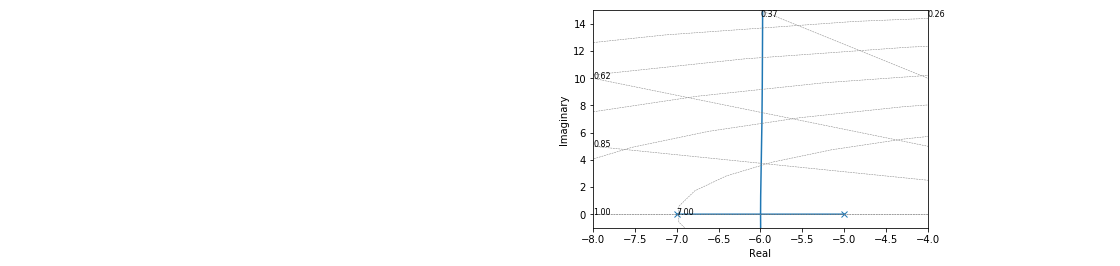

In [84]:
#Buscando el nuevo valor del set point para un amortiguamiento de 25%
co.root_locus(Gt,xlim=[-8,-4], ylim=[-1,15], plotstr='C0', Plot=True, grid=True)

#### Si observamos el los arrays que devuelve la funcion co.rootlocus, tenemos que el lugar de las raices se a movido unas pequeñas milesimas con respecto al del sistema original, el primer conjuto de arrays representa los puntos en el plano sigma+jw para los cuales k tiene un posible valor, el otro array que regresa la funcion corresponde a los valores de k asociados a cada punto de la tupla anterior.

### El valor de kt de los punto obtenidos es de kt=183.561, por lo tanto el valor de Kc=0.9874 (atenua la ganacia general del sistema)

In [85]:
#Agregando al sistema la ganancia
Gt1=co.series(Gt,183.561)
Gt1


        183.6 s + 21.4
-------------------------------
s^3 + 12.06 s^2 + 35.7 s + 2.04

In [86]:
#Funcion de transferencia del sistema a lazo cerrado
sys1=feedback(Gt1)
sys1


          183.6 s + 21.4
---------------------------------
s^3 + 12.06 s^2 + 219.3 s + 23.44

### Respuesta al escalon unitario de sistema compensado 

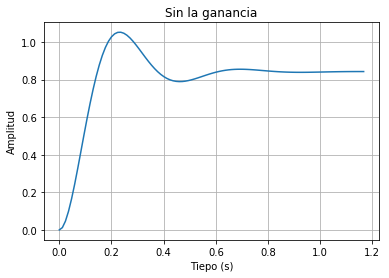

In [87]:
a1,b1=control.matlab.step(sys1, T=None, X0=0.0, input=0, output=None, return_x=False) 
plt.plot(b,a)
plt.xlabel("Tiepo (s)")
plt.ylabel("Amplitud")
plt.title("Sin la ganancia")
plt.grid()

In [88]:
control.matlab.step(sys1, T=None, X0=0.0, input=0, output=None, return_x=False) 

(array([0.        , 0.85687594, 0.85107816, 0.85531863, 0.85925683,
        0.8629229 , 0.86633881, 0.86952154, 0.87248699, 0.87525001,
        0.87782441, 0.88022306, 0.88245798, 0.88454032, 0.88648052,
        0.88828826, 0.8899726 , 0.89154196, 0.89300419, 0.89436659,
        0.895636  , 0.89681874, 0.89792075, 0.89894752, 0.89990421,
        0.90079558, 0.90162611, 0.90239994, 0.90312094, 0.90379272,
        0.90441865, 0.90500184, 0.90554523, 0.90605152, 0.90652325,
        0.90696277, 0.90737229, 0.90775386, 0.90810937, 0.90844062,
        0.90874926, 0.90903682, 0.90930476, 0.9095544 , 0.909787  ,
        0.91000373, 0.91020566, 0.9103938 , 0.9105691 , 0.91073244,
        0.91088462, 0.91102642, 0.91115853, 0.91128163, 0.91139632,
        0.91150318, 0.91160275, 0.91169552, 0.91178196, 0.9118625 ,
        0.91193754, 0.91200746, 0.9120726 , 0.9121333 , 0.91218985,
        0.91224254, 0.91229164, 0.91233738, 0.91238001, 0.91241972,
        0.91245672, 0.91249119, 0.91252332, 0.91

#### si observamos el ultimo valor del primer array, el cual es 0.91289676. Este valo no supera una mejora de error del 50%, por lo que aumentaremos el valor de la ganacia. 

#### Con una ganacia Kt de 210, por lo que el valor de Kc es de 1.12970, tenemos:

In [89]:
#Agregando al sistema la ganancia
Gt1=co.series(Gt,210)
Gt1


         210 s + 24.48
-------------------------------
s^3 + 12.06 s^2 + 35.7 s + 2.04

In [90]:
#Funcion de transferencia del sistema a lazo cerrado
sys1=feedback(Gt1)
sys1


          210 s + 24.48
---------------------------------
s^3 + 12.06 s^2 + 245.7 s + 26.52

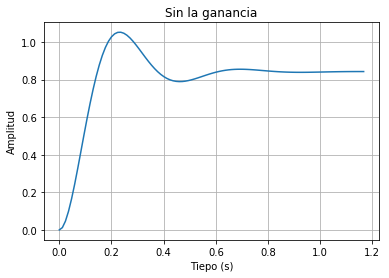

In [92]:
a2,b2=control.matlab.step(sys1, T=None, X0=0.0, input=0, output=None, return_x=False) 
plt.plot(b,a)
plt.xlabel("Tiepo (s)")
plt.ylabel("Amplitud")
plt.title("Sin la ganancia")
plt.grid()

In [93]:
control.matlab.step(sys1, T=None, X0=0.0, input=0, output=None, return_x=False) 

(array([0.        , 0.88070115, 0.86700994, 0.87117366, 0.87471003,
        0.87801194, 0.88108831, 0.88395467, 0.88662536, 0.88911373,
        0.89143224, 0.89359247, 0.89560523, 0.89748059, 0.89922793,
        0.90085599, 0.90237291, 0.90378627, 0.90510315, 0.90633013,
        0.90747336, 0.90853854, 0.909531  , 0.91045572, 0.91131731,
        0.91212008, 0.91286805, 0.91356496, 0.9142143 , 0.91481931,
        0.91538302, 0.91590824, 0.91639761, 0.91685358, 0.91727842,
        0.91767425, 0.91804307, 0.9183867 , 0.91870688, 0.9190052 ,
        0.91928316, 0.91954214, 0.91978345, 0.92000828, 0.92021776,
        0.92041294, 0.9205948 , 0.92076424, 0.92092212, 0.92106921,
        0.92120627, 0.92133397, 0.92145295, 0.92156381, 0.92166711,
        0.92176335, 0.92185302, 0.92193657, 0.92201442, 0.92208695,
        0.92215453, 0.9222175 , 0.92227617, 0.92233083, 0.92238176,
        0.92242922, 0.92247343, 0.92251463, 0.92255302, 0.92258878,
        0.9226221 , 0.92265315, 0.92268208, 0.92

### Ahora si observamos el ultimo valor del primer array, se puede apreciar que se supero el error en un poco mas de 50%